#⏰%ENDOMETRIOSIS PREDICTION # 0 No endomeet vs 1 with Endomeet

#⏰**Step 1: Importing Required Libraries**

#✅In this part, we are installing all the required libraries
#✅Imports various Python libraries used for data analysis, visualization, machine learning, and deep learning.
#✅Data manipulation and analysis (pandas, numpy).
#✅Data visualization (seaborn, matplotlib).
#✅Machine learning (Logistic Regression from sklearn).
#⚡Deep learning (tensorflow).

In [22]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import tensorflow as tf

#⚽**Step 2: Reading Dataset**

#df.head() is a pandas function used to display the first few rows of a DataFrame. By default, it shows the first five rows, but you can specify the number of rows to display.

In [23]:
df  = pd.read_csv('//content/structured_endometriosis_data.csv')
df.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


#⏰**Step3: Analyzing the Data**

#Analyzing the Data Gaining general knowledge about the data—including its values, kinds, number of rows and columns, and missing values—is the primary objective of data understanding.

#shape: shape will show how many features (columns) and observations (rows) there are in the dataset.

In [24]:
df.shape

(10000, 7)

#⏰df.size is an attribute in pandas that returns the total number of elements (cells) in the DataFrame

In [25]:
df.size

70000

#⏰info() facilitates comprehension of the data type and related information, such as the quantity of records in each column, whether the data is null or not, the type of data, and the dataset’s memory use.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


#⚛**Description of the data**

#Displays the data types of all columns in the DataFrame df.

In [27]:
df.dtypes

,0
Age,int64
Menstrual_Irregularity,int64
Chronic_Pain_Level,float64
Hormone_Level_Abnormality,int64
Infertility,int64
BMI,float64
Diagnosis,int64


#⏰**Step 4 : Checking Missing Values**

#⏰df.isnull().sum() checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column

In [28]:
df.isnull().sum()

,0
Age,0
Menstrual_Irregularity,0
Chronic_Pain_Level,0
Hormone_Level_Abnormality,0
Infertility,0
BMI,0
Diagnosis,0


#⏰df.duplicated() is a pandas function used to identify duplicate rows in a DataFrame. It returns a Boolean Series, where True indicates a duplicate row and False indicates a unique row.

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.describe()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


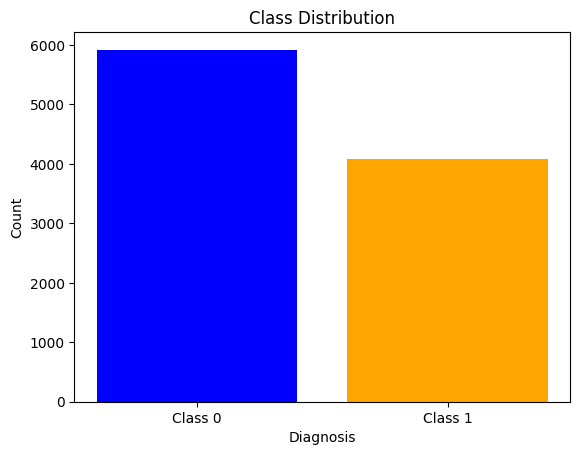

In [31]:
# Plot
class_counts = df['Diagnosis'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], labels=['Class 0', 'Class 1'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [32]:
class_counts = df['Diagnosis'].value_counts()
print(class_counts)

Diagnosis
0    5921
1    4079
Name: count, dtype: int64


#Dataset has the following class distribution for the Diagnosis column:
#Class 0: 5,921 instances Class 1: 4,079 instances This suggests the dataset is somewhat balanced but has slightly more Class 0 cases.

#⭕Creates a histogram to visualize the distribution of the 'Age' column in the dataset.

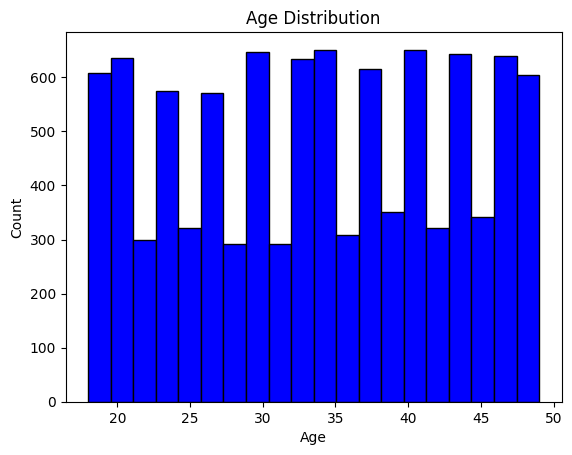

In [33]:
plt.hist(df['Age'], bins=20, color="blue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

#⭕creates a boxplot to visualize the distribution of BMI across different Diagnosis classes.

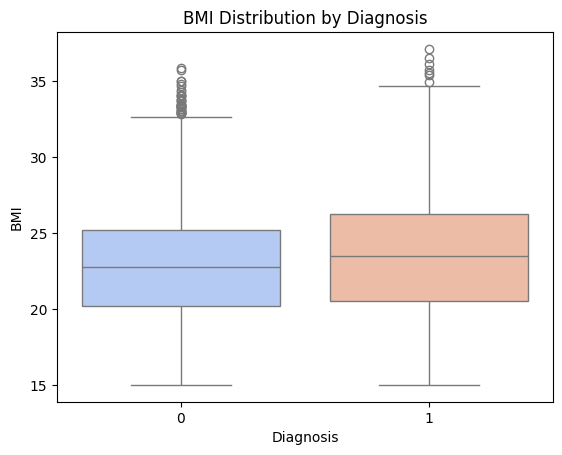

In [34]:
sns.boxplot(x="Diagnosis", y="BMI", data=df, hue="Diagnosis", palette="coolwarm", legend=False)
plt.title("BMI Distribution by Diagnosis")
plt.show()

#🐤Correlation Heatmap

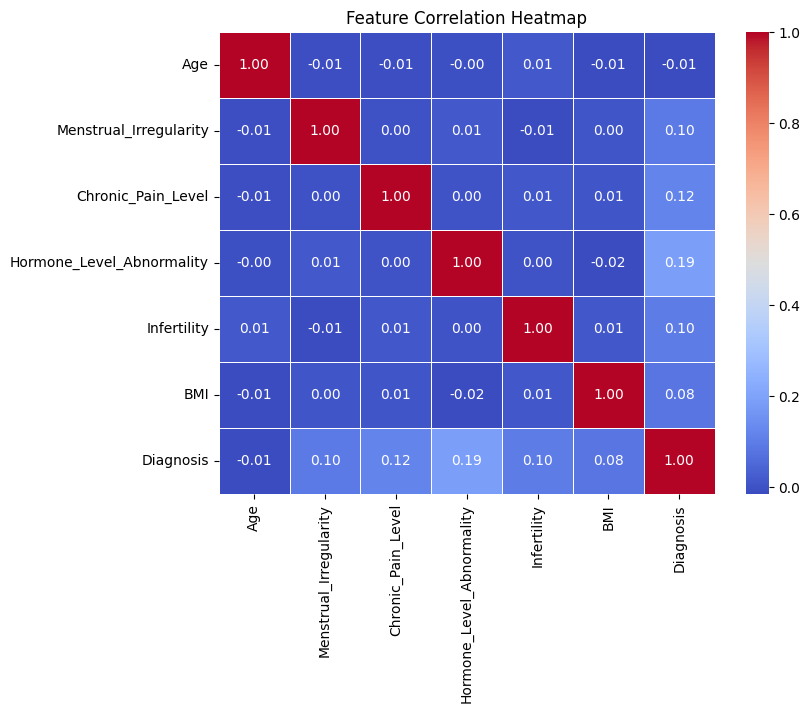

In [35]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#⏰Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.

#Darker colors signify strong correlation, while light colors represents weaker correlations. Positive correlation variable move in same directions. As one increases, the other also increases. Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.

#**Histogram of Chronic pain level**

#⛹The distribution of Chronic Pain Levels across the dataset. The most common pain levels (tallest bars). Whether the distribution is skewed (more values on one side). Possible outliers (extreme values far from the rest).

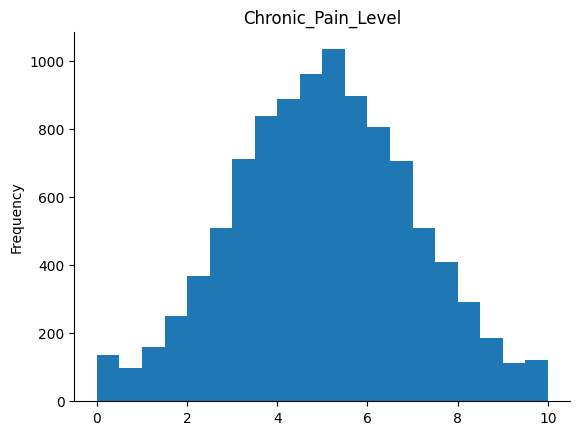

In [36]:
# @title Chronic_Pain_Level

from matplotlib import pyplot as plt
df['Chronic_Pain_Level'].plot(kind='hist', bins=20, title='Chronic_Pain_Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**KDE Plot for Chronic Pain Level by Diagnosis**

#⚡Kernel Density Estimate (KDE) plot, which is a smooth probability distribution of Chronic Pain Level for each Diagnosis class.
#Comparison of Pain Levels between Diagnosis = 0 (Class 0) and Diagnosis = 1 (Class 1).

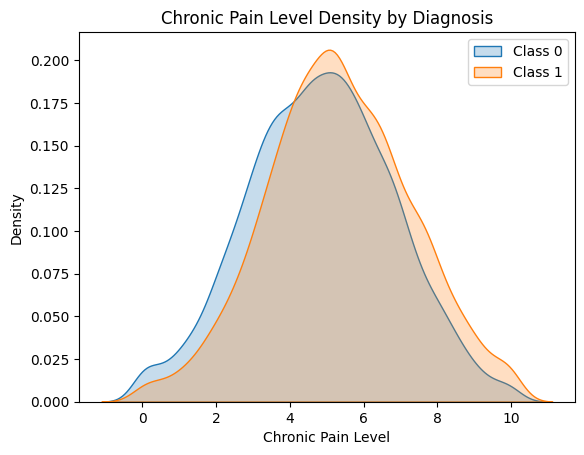

In [37]:
sns.kdeplot(df[df['Diagnosis'] == 0]['Chronic_Pain_Level'], label="Class 0", fill=True)
sns.kdeplot(df[df['Diagnosis'] == 1]['Chronic_Pain_Level'], label="Class 1", fill=True)
plt.xlabel("Chronic Pain Level")
plt.title("Chronic Pain Level Density by Diagnosis")
plt.legend()
plt.show()

#**DATA PROCESSING**

In [38]:
dataset_new = df
dataset_new[['Age',	'Menstrual_Irregularity',	'Chronic_Pain_Level',	'Hormone_Level_Abnormality',	'Infertility',	'BMI']] = dataset_new[['Age',	'Menstrual_Irregularity',	'Chronic_Pain_Level',	'Hormone_Level_Abnormality',	'Infertility',	'BMI']] = dataset_new[['Age',	'Menstrual_Irregularity',	'Chronic_Pain_Level',	'Hormone_Level_Abnormality',	'Infertility',	'BMI']] = dataset_new[['Age',	'Menstrual_Irregularity',	'Chronic_Pain_Level',	'Hormone_Level_Abnormality',	'Infertility',	'BMI']] = dataset_new[['Age',	'Menstrual_Irregularity',	'Chronic_Pain_Level',	'Hormone_Level_Abnormality',	'Infertility',	'BMI']].replace(0,np.nan) # Changed np.Nan to np.nan

In [39]:
df.isnull().sum()

,0
Age,0
Menstrual_Irregularity,3025
Chronic_Pain_Level,71
Hormone_Level_Abnormality,4089
Infertility,7017
BMI,0
Diagnosis,0


In [40]:
dataset_new['Age'].fillna(dataset_new['Age'].mean(), inplace=True)
dataset_new['Menstrual_Irregularity'].fillna(dataset_new['Menstrual_Irregularity'].mean(), inplace=True)
dataset_new['Chronic_Pain_Level'].fillna(dataset_new['Chronic_Pain_Level'].mean(), inplace=True)
dataset_new['Hormone_Level_Abnormality'].fillna(dataset_new['Hormone_Level_Abnormality'].mean(), inplace=True) # Removed the extra tab character in the column name
dataset_new['Infertility'].fillna(dataset_new['Infertility'].mean(), inplace=True)
dataset_new['BMI'].fillna(dataset_new['BMI'].mean(), inplace=True)
dataset_new['Diagnosis'].fillna(dataset_new['Diagnosis'].mean(), inplace=True)

In [41]:
df.isnull().sum()

,0
Age,0
Menstrual_Irregularity,0
Chronic_Pain_Level,0
Hormone_Level_Abnormality,0
Infertility,0
BMI,0
Diagnosis,0


#**LOGISTICS REGRESSION**

#✈separates the target variable (y) from the feature variables (X) in the dataset for machine learning tasks.

#✈Extracts the target variable (Diagnosis) from dataset_new.
#y will contain only the Diagnosis column (dependent variable).

In [42]:
y = dataset_new['Diagnosis']
X = dataset_new.drop('Diagnosis', axis=1)

#✅splits the dataset into training and testing sets for machine learning.

#✅Imports the train_test_split function from sklearn.model_selection.

#✅This function is used to randomly split the dataset into training and test subsets.


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#⏰trains a Logistic Regression model on the training data and makes predictions on the test set.



In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#✈y_pred is an array of predicted class labels generated by the trained model for the test dataset (X_test).

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import  confusion_matrix
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[1118  102]
 [ 658  122]]


#✅1118 patients were correctly predicted as not having the condition (TN).
#✅102 were incorrectly predicted as having the condition (FP - Type I error).
#✅658 were missed cases, i.e., actual cases were wrongly predicted as negative (FN - Type II error).
#✅122 were correctly predicted as having the condition (TP).

Text(0.5, 1.1, 'Confusion matrix')

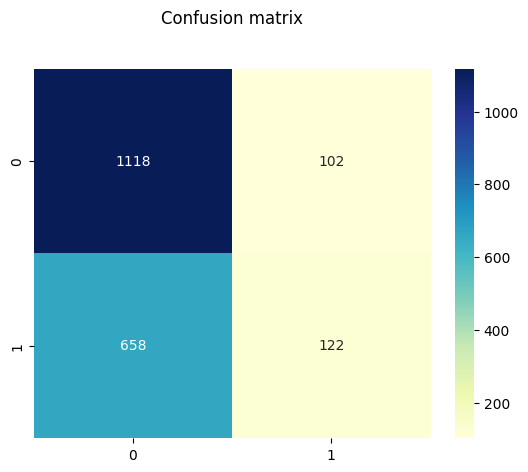

In [47]:
sns.heatmap(pd.DataFrame(cn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.62

#⚓accuracy score of 0.62 (62%) means that 62% of the predictions made by your model were correct, while 38% were incorrect.

#weak model

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.62


#⚛predicts whether a person has endometriosis based on their features and then prints the result.



In [51]:
y_pred = model.predict([[24,1,8.361531,0,	0	,19.451314]])
print(y_pred)
if y_pred ==1:
  print("endomeet")
else:
    print("not endomeet")

[1]
endomeet


In [52]:
from google.colab import files

# Example: download a file named "endometriosis_model.pkl"
files.download("endometriosis_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
from google.colab import files
uploaded = files.upload()

Saving endometriosis_model (1).pkl to endometriosis_model (1) (1).pkl


In [54]:
!pip install streamlit pyngrok


In [55]:
import joblib

# Save your trained model
joblib.dump(model, 'endometriosis_model.pkl')


['endometriosis_model.pkl']

In [56]:
import joblib
from sklearn.linear_model import LogisticRegression

# Assuming dataset_new, X_train, y_train are defined
# Create and train the model if you haven't already
model = LogisticRegression()
model.fit(X_train, y_train)

# Now you can save the model
joblib.dump(model, 'endometriosis_model.pkl')

['endometriosis_model.pkl']

In [57]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the model
model = joblib.load('endometriosis_model.pkl')

st.title("Endometriosis Prediction")

# Input form
age = st.number_input("Age", min_value=0)
pain = st.selectbox("chronic_pain", [0, 1])
value1 = st.number_input("menstrual_irregularity")
value2 = st.number_input("Hormone_level_Abnormality")
value3 = st.number_input("Infertility")
value4 = st.number_input("BMI")

# Predict button
if st.button("Predict"):
    input_data = np.array([[age, pain, value1, value2, value3, value4]])
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.success("Endometriosis detected (Endomeet)")
    else:
        st.info("No Endometriosis detected")


Overwriting app.py


In [59]:
!ngrok authtoken 2vilSDJIAc0O2wt7n2JdsOTzE0d_5XxA6hBk23gLRGN7HPkYX  # Replace <your_authtoken> with your actual authtoken
from pyngrok import ngrok

# Kill any previous tunnels if needed
!pkill -f ngrok  # Updated to kill all ngrok processes

# Wait a moment before starting new tunnels
import time
time.sleep(5)

# Run the Streamlit app in the background
!streamlit run app.py &>/content/logs.txt &
time.sleep(5)

# Create a public URL
public_url = ngrok.connect(addr="8501")
print("Streamlit app is live at:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://2d13-34-23-65-173.ngrok-free.app" -> "http://localhost:8501"
